In [28]:
import pandas as pd

df = pd.read_csv("../Data/tiendas_con_direccion.csv")
df_ventas = pd.read_csv("../Data/venta.csv")
df_tiendas = pd.read_csv("../Data/DIM_TIENDA.csv")

# Merge the two DataFrames on the 'id_tienda' column
df_merged = pd.merge(df, df_ventas, on='TIENDA_ID')

# Merge the result with the third DataFrame on 'id_tienda'
df_merged = pd.merge(df_merged, df_tiendas, left_on='TIENDA_ID', right_on='TIENDA_ID')

# Drop 'neighborhood' column
df_merged.drop(columns=['neighborhood'], inplace=True)

# Rename 'locality' for 'municipio'
df_merged.rename(columns={'locality': 'municipio'}, inplace=True)



print(df_merged.head())

# Save the merged DataFrame to a new CSV file
df_merged.to_csv("../Data/venta-con-municipio.csv", index=False)

   TIENDA_ID  LATITUD_NUM_x  LONGITUD_NUM_x  postal_code  municipio  MES_ID  \
0        126       25.69107      -100.21261      67165.0  Guadalupe  202406   
1        126       25.69107      -100.21261      67165.0  Guadalupe  202402   
2        126       25.69107      -100.21261      67165.0  Guadalupe  202307   
3        126       25.69107      -100.21261      67165.0  Guadalupe  202310   
4        126       25.69107      -100.21261      67165.0  Guadalupe  202304   

   VENTA_TOTAL  PLAZA_CVE NIVELSOCIOECONOMICO_DES ENTORNO_DES  MTS2VENTAS_NUM  \
0     78331.04          1                      BC       Hogar          127.42   
1    984454.29          1                      BC       Hogar          127.42   
2   1096866.62          1                      BC       Hogar          127.42   
3    775114.25          1                      BC       Hogar          127.42   
4   1095804.32          1                      BC       Hogar          127.42   

   PUERTASREFRIG_NUM  CAJONESESTACIONA

In [ ]:
# Convert 'MES_ID' to datetime format
df_ventas['MES_ID'] = pd.to_datetime(df_ventas['MES_ID'], format='%Y%m')

# Sum of sales by 'locality' and 'MES_ID'
df_ventas_grouped = df_merged.groupby(['locality', 'MES_ID'])['VENTA_TOTAL'].sum().reset_index()
df_top3 = df_ventas_grouped.groupby('MES_ID').apply(lambda x: x.nlargest(3, 'VENTA_TOTAL')).reset_index(drop=True)
df_top3 = df_top3.sort_values(by='MES_ID')
df_top3 = df_top3.rename(columns={'VENTA_TOTAL': 'top_cantidad'})

# Graph the top 3 sales by locality for each month
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(data=df_top3, x='MES_ID', y='top_cantidad', hue='locality')
plt.title('Top 3 Sales by Locality for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.legend(title='Locality')
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


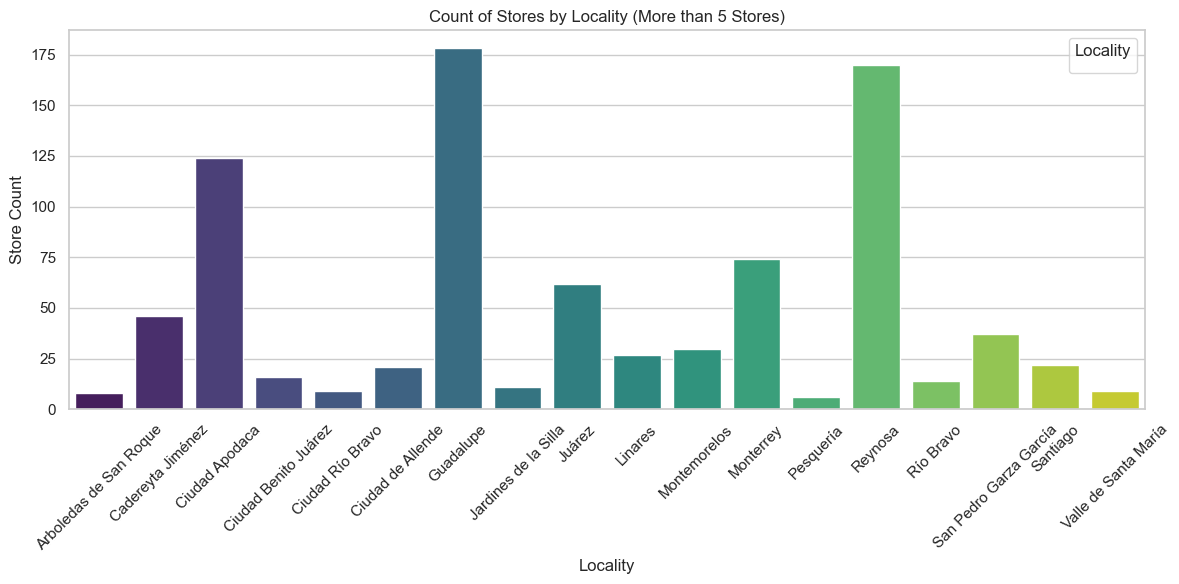

In [19]:
# Count of stores by locality in df only if more than 5 stores and add legend and amount of stores
df_store_count = df.groupby('locality').size().reset_index(name='store_count')
df_store_count = df_store_count[df_store_count['store_count'] > 5]
# Graph the count of stores by locality
plt.figure(figsize=(12, 6))
sns.barplot(data=df_store_count, x='locality', y='store_count', palette='viridis')
plt.title('Count of Stores by Locality (More than 5 Stores)')
plt.ylabel('Store Count')
plt.legend(title='Locality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()